In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:
dataset = pd.read_csv('permanent strain modified data.csv')
dataset.head()

,Aggregate,source,DAG,Binder,AV,PS
0,19.0,15,5.58,500,7.243,2.362
1,19.0,15,5.58,500,5.982,2.311
2,19.0,15,5.58,500,4.003,1.644
3,19.0,15,5.58,500,3.449,1.161
4,19.0,15,5.58,500,3.262,0.958


In [21]:
pip install scikit-learn

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Aggregate  600 non-null    float64
 1   source     600 non-null    int64  
 2   DAG        600 non-null    float64
 3   Binder     600 non-null    int64  
 4   AV         600 non-null    float64
 5   PS         600 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 28.3 KB


In [23]:
X = dataset.iloc[:, 0:5]
y = dataset.iloc[:,-1].values
X0= dataset.iloc[:,0]
X1= dataset.iloc[:,1]
X2= dataset.iloc[:,2]
X3= dataset.iloc[:,3]


In [24]:
X

,Aggregate,source,DAG,Binder,AV
0,19.0,15,5.58,500,7.243
1,19.0,15,5.58,500,5.982
2,19.0,15,5.58,500,4.003
3,19.0,15,5.58,500,3.449
4,19.0,15,5.58,500,3.262
...,...,...,...,...,...
595,37.5,25,5.82,3000,7.038
596,37.5,25,5.82,3000,5.464
597,37.5,25,5.82,3000,4.009
598,37.5,25,5.82,3000,3.529


In [25]:
y

array([2.36, 2.31, 1.64, 1.16, 0.96, 2.87, 1.94, 1.88, 1.67, 1.21, 2.15,
       1.38, 1.29, 1.12, 1.02, 2.15, 1.19, 1.32, 1.1 , 1.  , 3.34, 2.53,
       1.84, 1.78, 1.71, 2.19, 1.81, 1.62, 0.82, 0.72, 2.78, 2.21, 1.73,
       1.43, 1.17, 1.56, 1.08, 0.78, 0.74, 0.68, 2.07, 1.12, 0.99, 0.88,
       0.75, 3.17, 2.08, 1.83, 1.81, 1.5 , 1.99, 1.58, 1.6 , 0.93, 0.74,
       2.27, 1.89, 1.37, 1.42, 0.94, 1.61, 1.19, 0.83, 0.75, 0.67, 1.85,
       0.93, 1.11, 0.74, 0.71, 2.52, 2.08, 1.71, 1.2 , 1.01, 2.48, 2.19,
       1.85, 1.8 , 1.08, 3.37, 2.53, 2.27, 1.33, 1.77, 2.15, 1.38, 1.29,
       1.12, 1.02, 2.51, 1.46, 1.16, 1.25, 1.2 , 3.78, 2.91, 2.38, 2.08,
       1.96, 2.34, 2.1 , 1.66, 1.71, 0.92, 3.17, 2.33, 1.12, 1.57, 1.24,
       2.02, 1.4 , 2.12, 1.02, 0.89, 2.42, 1.22, 1.28, 1.06, 0.94, 3.57,
       2.73, 2.22, 1.93, 1.81, 2.23, 1.92, 1.5 , 1.08, 0.83, 2.63, 1.89,
       1.75, 1.37, 1.29, 2.63, 1.89, 1.75, 1.37, 1.29, 2.02, 1.16, 1.83,
       0.81, 0.78, 2.87, 2.25, 1.02, 1.5 , 1.34, 1.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
X_train

,Aggregate,source,DAG,Binder,AV
118,19.0,25,5.32,1000,3.535
362,13.0,15,5.05,3000,3.976
55,19.0,15,6.16,3000,6.889
90,19.0,25,5.32,500,6.913
390,13.0,25,5.32,500,6.913
...,...,...,...,...,...
277,26.5,25,5.27,3000,4.037
9,19.0,15,6.16,500,2.399
359,13.0,15,6.16,3000,3.463
192,26.5,15,4.90,1000,4.121


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor(min_samples_split=3, n_estimators=500, random_state=5)

regressor.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500, random_state=5)

In [29]:
folds  = 5
score_calc = 'neg_mean_squared_error'

In [30]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [31]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8474491604994149

In [33]:
regressor.predict([[19, 17.  , 389.  ,   5.37,  35.  ]]) 

c:\Users\hp\Desktop\PS\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.65])

In [34]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'min_samples_split' : [3,4,6,10,20], 'n_estimators' : [70,500], 'random_state': [5] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv = folds, refit=True, verbose = 0, scoring = score_calc)
grid_rf.fit(X_train, y_train)

sc_rf = get_best_score(grid_rf)
pred_rf = grid_rf.predict(X_test)

0.2806779641103062
{'min_samples_split': 3, 'n_estimators': 500, 'random_state': 5}
RandomForestRegressor(min_samples_split=3, n_estimators=500, random_state=5)


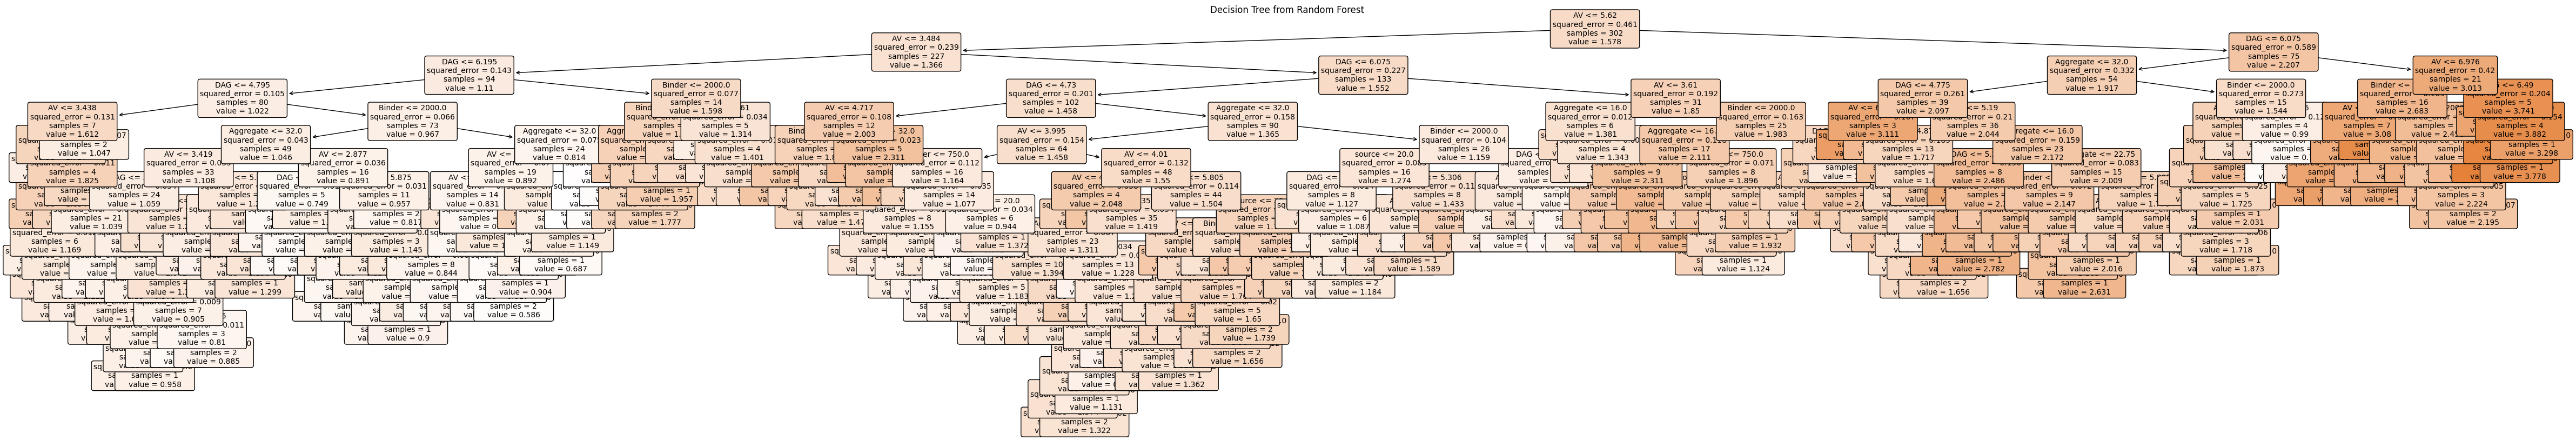

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_to_plot = regressor.estimators_[40]

plt.figure(figsize=(60, 10))
plot_tree(tree_to_plot, feature_names=dataset.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [36]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(regressor,file)